# Seattle Collision Data Exploration

For details on all attributes visit the following link -
https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf

Data Set - https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0?geometry=-123.310%2C47.452%2C-121.352%2C47.776

ESRI Metadata - https://www.arcgis.com/sharing/rest/content/items/5b5c745e0f1f48e7a53acec63a0022ab/info/metadata/metadata.xml?format=default&output=html

This project uses collision data from Seattle Department of Transportation (SDOT).  The data is <a href="https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0?geometry=-123.310%2C47.452%2C-121.352%2C47.776">hosted</a> by SDOT GIS Division and curated by the SDOT Traffic Division where collisions are collected from Seattle Police Department after a collision is reported.
<br><br>
General characteristics of the subset -
- Format: CSV
- Timeframe: January 2004 to May 2020
- Columns: 38, 37 are unique
- Rows:  194,673
- Bounding Coordinates
-- West Bounding Coordinate: -122.4754
-- East Bounding Coordinate: -122.2008
-- North Bounding Coordinate: 47.7582
-- South Bounding Coordinate: 47.4814

*Seattle-Collisions.csv* attributes with data type, detail and examples as defined in Collision_OD PDF:

- Severity
    - **SEVERITYCODE** - Text,100 - code that corresponds to the severity, e.g., 3—fatality, 2b—serious injury, 2—injury, 1—property damage, 0—unknown
    - **SEVERITYDESC** - Text,300 - Detailed description of the severity, e.g., Property Damage Only Collision, Injury Collision
- Location, Time
    - **INCDATE** - Date - date of the incident, ex: 2013/03/27 00:00:00+00
    - **INCDTTM** - Text,30 - date and time of the incident, ex: 3/27/2013  2:54:00 PM 
    - **X** - float - longitude of the collision
    - **Y** - float - latitude of the collision
    - **LOCATION** - Text,255 - description of the general location of the collision, e.g. 5TH AVE NE AND NE 103RD ST
    - **ADDRTYPE** - Text,12 -  collision address type, e.g, alley, block, intersection
    - **JUNCTIONTYPE** - Text,300 - category of junction where the collision occurred. e.g., At Intersection (intersection related)
    - **INTKEY** - Double - key corresponding to the intersection associated with a collision 
    - **CROSSWALKKEY** - Long - key for the crosswalk at which the collision occurred 
- Environment Conditions
    - **WEATHER** - Text,300 - weather condition, e.g., Clear, Overcast, Raining, Snowing 
    - **ROADCOND** - Text,300 - road condition, e.g., Wet, Dry
    - **LIGHTCOND** - Text,300 - light condition, e.g., Daylight, Dark, Dark - Street Lights On
- Counts
    - **VEHCOUNT** - Double - number of vehicles involved in the collision
    - **PERSONCOUNT** - Double - total number of people involved in the collision 
    - **PEDCOUNT** - Double - number of pedestrians involved in the collision 
    - **PEDCYLCOUNT** - Double - number of bicycles involved in the collision
- Human Factors
    - **INATTENTIONIND** - Text,1 - whether or not collision was due to inattention (Y/N) 
    - **UNDERINFL** - Text,1 - whether or not a driver involved was under the influence of drugs or alcohol 
- Collision Descriptors
    - **COLLISIONTYPE** - Text,300 - collision type, e.g., Angle, Sideswipe, Parked Car
    - **SPEEDING** - Text,1 - whether or not speeding was a factor in the collision (Y/N) 
    - **SEGLANEKEY** - Long - key for the lane segment in which the collision occurred 
    - **HITPARKEDCAR** - Text,1 - whether or not the collision involved hitting a parked car (Y/N) 
    - **PEDROWNOTGRNT** - Text,1 - whether or not the pedestrian right of way was not granted (Y/N) 
    - **SDOTCOLNUM** - Text, 10 - number given to the collision by SDOT 
    - **SDOT_COLCODE** - Text,10 - code assigned to the collision by SDOT
    - **SDOT_COLDESC** - Text,300 - description corresponding to the collision code 
    - **ST_COLCODE** - Text,10 - code provided by the state that describes the collision 
    - **ST_COLDESC** - Text,300 - description that corresponds to the state’s coding designation 
- Miscellaneous
    - **OBJECTID** - Double - ESRI unique identifier 
    - **INCKEY** - Long - A unique key for the incident 
    - **COLDETKEY** - Long - Secondary key for the incident 
    - **EXCEPTRSNCODE** - Text,10 - undefined 
    - **EXCEPTRSNDESC** - Text,300 - A unique key for the incident 
    - **REPORTNO** - Long - undefined 
    - **STATUS** - Text - undefined 
<br>

In [ ]:
!conda install -c conda-forge statsmodels -y
!conda install -c conda-forge pygeohash -y

In [3]:
import pandas as pd
import types
import itertools
import numpy as np
from datetime import datetime, timedelta, timezone 
import time
import pygeohash as gh
import os
import folium
#import pydotplus
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
%matplotlib inline

In [4]:
df = pd.read_csv('Seattle_Collisions.csv', low_memory=False)
print('File downloaded')

File downloaded


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [6]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [7]:
df.info

<bound method DataFrame.info of         SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY  \
0                  2 -122.323148  47.703140         1    1307       1307   
1                  1 -122.347294  47.647172         2   52200      52200   
2                  1 -122.334540  47.607871         3   26700      26700   
3                  1 -122.334803  47.604803         4    1144       1144   
4                  2 -122.306426  47.545739         5   17700      17700   
...              ...         ...        ...       ...     ...        ...   
194668             2 -122.290826  47.565408    219543  309534     310814   
194669             1 -122.344526  47.690924    219544  309085     310365   
194670             2 -122.306689  47.683047    219545  311280     312640   
194671             2 -122.355317  47.678734    219546  309514     310794   
194672             1 -122.289360  47.611017    219547  308220     309500   

       REPORTNO   STATUS      ADDRTYPE   INTKEY  ... RO

In [8]:
df.drop(columns=['OBJECTID','INCKEY','COLDETKEY','INTKEY','SEVERITYCODE.1'],inplace=True)

In [9]:
df.isna().sum()/len(df)

SEVERITYCODE      0.000000
X                 0.027400
Y                 0.027400
REPORTNO          0.000000
STATUS            0.000000
ADDRTYPE          0.009894
LOCATION          0.013751
EXCEPTRSNCODE     0.564341
EXCEPTRSNDESC     0.971039
SEVERITYDESC      0.000000
COLLISIONTYPE     0.025191
PERSONCOUNT       0.000000
PEDCOUNT          0.000000
PEDCYLCOUNT       0.000000
VEHCOUNT          0.000000
INCDATE           0.000000
INCDTTM           0.000000
JUNCTIONTYPE      0.032511
SDOT_COLCODE      0.000000
SDOT_COLDESC      0.000000
INATTENTIONIND    0.846897
UNDERINFL         0.025088
WEATHER           0.026100
ROADCOND          0.025746
LIGHTCOND         0.026557
PEDROWNOTGRNT     0.976026
SDOTCOLNUM        0.409595
SPEEDING          0.952058
ST_COLCODE        0.000092
ST_COLDESC        0.025191
SEGLANEKEY        0.000000
CROSSWALKKEY      0.000000
HITPARKEDCAR      0.000000
dtype: float64

# Location Exploration

In [10]:
#X 0.027400
#Y 0.027400
df.dropna(subset=['X', 'Y'],inplace=True)

<AxesSubplot:xlabel='X', ylabel='Y'>

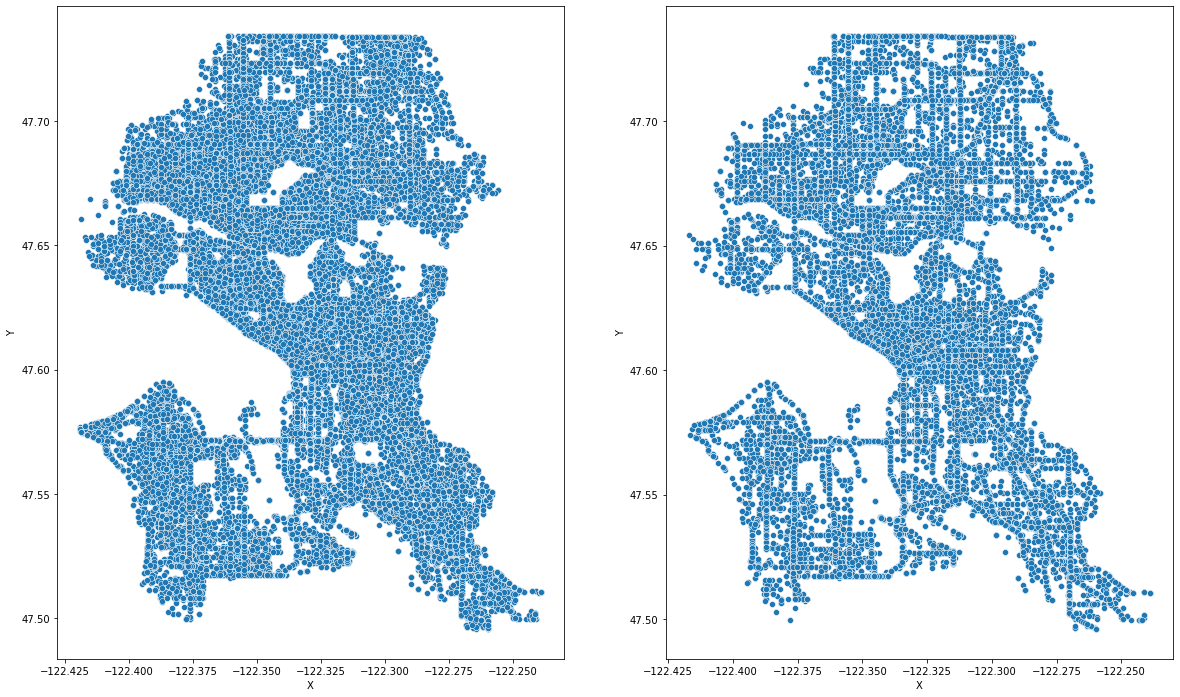

In [11]:
fig, ax = plt.subplots(1,2, figsize = (20, 12))
ax1, ax2 = ax.flatten()
sns.scatterplot(x="X", y="Y", data=df[(df.SEVERITYCODE == 1)], ax=ax1)
sns.scatterplot(x="X", y="Y", data=df[(df.SEVERITYCODE == 2)], ax=ax2)

In [12]:
df[['X', 'Y']].apply(pd.Series.value_counts)

,X,Y
-122.419091,1.0,NaN
-122.419032,14.0,NaN
-122.418973,1.0,NaN
-122.418757,1.0,NaN
-122.418615,8.0,NaN
...,...,...
47.734136,NaN,25.0
47.734136,NaN,63.0
47.734139,NaN,2.0
47.734141,NaN,2.0


In [13]:
# Collisions over time get logged with same geolocation
df['XY'] = df['X'].astype(str) + "," + df['Y'].astype(str)

In [14]:
df['XY'].describe()

count                      189339
unique                      23884
top       -122.3326533,47.7086545
freq                          265
Name: XY, dtype: object

In [15]:
print(str(df['XY'].value_counts().max()) + ' max collisions at the same geolocation')
print(str(df['XY'].value_counts().gt(100).sum()) + ' geolocations with 100+ collisions')
print(str(df['XY'].value_counts().gt(10).sum()) + ' geolocations with 10+ collisions')
print(str(df['XY'].value_counts().le(1).sum()) + ' geolocations with single collision')

265 max collisions at the same geolocation
52 geolocations with 100+ collisions
4685 geolocations with 10+ collisions
6354 geolocations with single collision


In [16]:
df['XY'].value_counts().to_frame().head(10)

,XY
"-122.3326533,47.7086545",265
"-122.34489609999999,47.717173100000004",254
"-122.32807859999998,47.60416123",252
"-122.34499679999999,47.72503555",239
"-122.2991597,47.57967346",231
"-122.35113390000002,47.57094178",212
"-122.3472943,47.64717249",190
"-122.3458631,47.61299081",161
"-122.3324513,47.60726631",160
"-122.26998789999999,47.52281564",152


In [17]:
df[(df.XY == '-122.3326533,47.7086545')].T

,2022,2502,2687,3136,3141,4108,4152,5805,7302,7594,...,178618,182466,185255,187081,187349,188479,190611,190634,190777,192389
SEVERITYCODE,2,2,2,2,1,1,1,1,2,1,...,1,2,2,2,1,2,1,1,1,1
X,-122.333,-122.333,-122.333,-122.333,-122.333,-122.333,-122.333,-122.333,-122.333,-122.333,...,-122.333,-122.333,-122.333,-122.333,-122.333,-122.333,-122.333,-122.333,-122.333,-122.333
Y,47.7087,47.7087,47.7087,47.7087,47.7087,47.7087,47.7087,47.7087,47.7087,47.7087,...,47.7087,47.7087,47.7087,47.7087,47.7087,47.7087,47.7087,47.7087,47.7087,47.7087
REPORTNO,2620638,1794180,3503143,3507818,1779712,1774062,1080334,1774048,1477566,1780880,...,3751591,E965211,3751103,E909944,3753843,3751679,3751553,3796148,E853281,EA06959
STATUS,Matched,Matched,Matched,Matched,Matched,Matched,Matched,Matched,Matched,Matched,...,Matched,Matched,Matched,Matched,Matched,Matched,Matched,Matched,Unmatched,Matched
ADDRTYPE,Block,Block,Block,Block,Block,Block,Block,Block,Block,Block,...,Block,Block,Block,Block,Block,Block,Block,Block,Block,Block
LOCATION,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,...,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...
EXCEPTRSNCODE,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,...,,,,,,,,,,
EXCEPTRSNDESC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SEVERITYDESC,Injury Collision,Injury Collision,Injury Collision,Injury Collision,Property Damage Only Collision,Property Damage Only Collision,Property Damage Only Collision,Property Damage Only Collision,Injury Collision,Property Damage Only Collision,...,Property Damage Only Collision,Injury Collision,Injury Collision,Injury Collision,Property Damage Only Collision,Injury Collision,Property Damage Only Collision,Property Damage Only Collision,Property Damage Only Collision,Property Damage Only Collision


In [19]:
seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)
df_top = df.XY.value_counts().nlargest(100)
df_top = pd.DataFrame(list(df_top.index.str.split(','))).astype(float)
for lat, lon in zip(df_top[1], df_top[0]):
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        color='red',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.5
    ).add_to(seattle_map)
seattle_map

In [20]:
#   km      
# 1   ± 2500
# 2   ± 630
# 3   ± 78
# 4   ± 20
# 5   ± 2.4
# 6   ± 0.61
# 7   ± 0.076
# 8   ± 0.019
# 9   ± 0.0024
# 10  ± 0.00060
# 11  ± 0.000074

In [21]:
# 6   ± 0.61 km
df['geohash_6']=df.apply(lambda x: gh.encode(x.Y, x.X, precision=6), axis=1)
# 7   ± 0.076 km
df['geohash_7']=df.apply(lambda x: gh.encode(x.Y, x.X, precision=7), axis=1)
# 8   ± 0.019 km
df['geohash_8']=df.apply(lambda x: gh.encode(x.Y, x.X, precision=8), axis=1)

In [22]:
df['geohash_6'].value_counts()

c23nb5    4655
c23nb6    4126
c23nb4    3552
c23nbk    3128
c23nb3    2609
          ... 
c23n2v       1
c23n31       1
c23n62       1
c23ncw       1
c22znm       1
Name: geohash_6, Length: 492, dtype: int64

In [23]:
df['geohash_7'].value_counts()

c23nb65    519
c23nb4k    320
c23nbeb    310
c23nb4j    305
c23nbk9    298
          ... 
c23p0vj      1
c23p05x      1
c23nbvk      1
c23n2ns      1
c23p1nh      1
Name: geohash_7, Length: 9525, dtype: int64

In [24]:
df[df.geohash_7 == 'c23nb65'].T

,218,396,632,1850,1862,2406,2835,3098,3120,3429,...,191275,191335,191470,191688,192247,192527,192923,193068,193784,194645
SEVERITYCODE,2,1,1,1,1,1,1,1,1,2,...,2,1,2,1,1,2,1,1,1,2
X,-122.328,-122.328,-122.328,-122.328,-122.329,-122.328,-122.328,-122.328,-122.328,-122.328,...,-122.328,-122.328,-122.328,-122.328,-122.328,-122.328,-122.328,-122.328,-122.328,-122.328
Y,47.6044,47.6044,47.6042,47.6042,47.6039,47.6042,47.6044,47.6044,47.6042,47.6042,...,47.6042,47.6042,47.6042,47.6038,47.6044,47.6042,47.6042,47.6042,47.6042,47.6042
REPORTNO,1796669,3548985,E920857,C721891,3549708,3643828,1790011,1783629,3599122,3598983,...,3793283,E933807,E945055,E937473,3750547,3835888,E940736,3812436,E884677,E851047
STATUS,Matched,Matched,Matched,Matched,Matched,Matched,Matched,Matched,Matched,Matched,...,Matched,Matched,Matched,Matched,Matched,Unmatched,Unmatched,Matched,Matched,Matched
ADDRTYPE,Block,Block,Intersection,Intersection,Block,Intersection,Block,Block,Intersection,Intersection,...,Intersection,Intersection,Intersection,Block,Block,Intersection,Intersection,Intersection,Intersection,Intersection
LOCATION,JAMES ST BETWEEN 6TH AVE AND 7TH AVE,JAMES ST BETWEEN 6TH AVE AND 7TH AVE,6TH AVE AND JAMES ST,6TH AVE AND JAMES ST,JAMES ST BETWEEN 5TH AVE AND 6TH AVE,6TH AVE AND JAMES ST,JAMES ST BETWEEN 6TH AVE AND 7TH AVE,JAMES ST BETWEEN 6TH AVE AND 7TH AVE,6TH AVE AND JAMES ST,6TH AVE AND JAMES ST,...,6TH AVE AND JAMES ST,6TH AVE AND JAMES ST,6TH AVE AND JAMES ST,6TH AVE BETWEEN JEFFERSON ST AND JAMES ST,JAMES ST BETWEEN 6TH AVE AND 7TH AVE,6TH AVE AND JAMES ST,6TH AVE AND JAMES ST,6TH AVE AND JAMES ST,6TH AVE AND JAMES ST,6TH AVE AND JAMES ST
EXCEPTRSNCODE,NaN,,,NaN,,,NaN,NaN,,,...,,,,,,,,,,
EXCEPTRSNDESC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SEVERITYDESC,Injury Collision,Property Damage Only Collision,Property Damage Only Collision,Property Damage Only Collision,Property Damage Only Collision,Property Damage Only Collision,Property Damage Only Collision,Property Damage Only Collision,Property Damage Only Collision,Injury Collision,...,Injury Collision,Property Damage Only Collision,Injury Collision,Property Damage Only Collision,Property Damage Only Collision,Injury Collision,Property Damage Only Collision,Property Damage Only Collision,Property Damage Only Collision,Injury Collision


There is a lot of information here but mostly covered by the geocoordinates.  Coupled with the SDOT collision code this provides a some narrative to the collision.  It woud be possible to extract this info as features but does not add much more value - perhaps to be revisited.

In [25]:
df['LOCATION'].value_counts().to_frame().head(20)

,LOCATION
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,265
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,254
6TH AVE AND JAMES ST,252
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,239
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST,231
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP,212
AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,190
1ST AVE BETWEEN BLANCHARD ST AND BELL ST,161
5TH AVE AND SPRING ST,160
RAINIER AVE S BETWEEN S HENDERSON ST AND S DIRECTOR N ST,152


# Time and Date Exploration

Analysis on the date of the collision. Check the month, weekday, hour, week in the year. Check peak or offpeak that would be similar to the workday hours, this might help with generalization.

In [26]:
df.dropna(subset=['INCDTTM'],inplace=True)

In [27]:
def peak_offpeak(inputDate):
    hour = inputDate.hour
    try:
        return 1 if (hour>=8 and hour<=18) else 0
    except:
        return 0

In [28]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['YEAR'] = df['INCDTTM'].dt.year
df['MONTH'] = df['INCDTTM'].dt.month
df['WEEKDAY'] = df['INCDTTM'].dt.weekday
df['HOUR'] = df['INCDTTM'].dt.strftime('%H').astype(int)
df['PEAKOROFFPEAK'] = df['INCDTTM'].apply(lambda x: peak_offpeak(x))
df['YEARWEEK'] = df["INCDTTM"].dt.week
#df_explore.shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [29]:
df['INCDTTM'].describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  189339
unique                 157960
top       2006-11-02 00:00:00
freq                       88
first     2004-01-01 00:00:00
last      2020-05-20 00:00:00
Name: INCDTTM, dtype: object

In [30]:
df['HOUR'].describe()

count    189339.000000
mean         11.182699
std           7.069444
min           0.000000
25%           6.000000
50%          12.000000
75%          17.000000
max          23.000000
Name: HOUR, dtype: float64

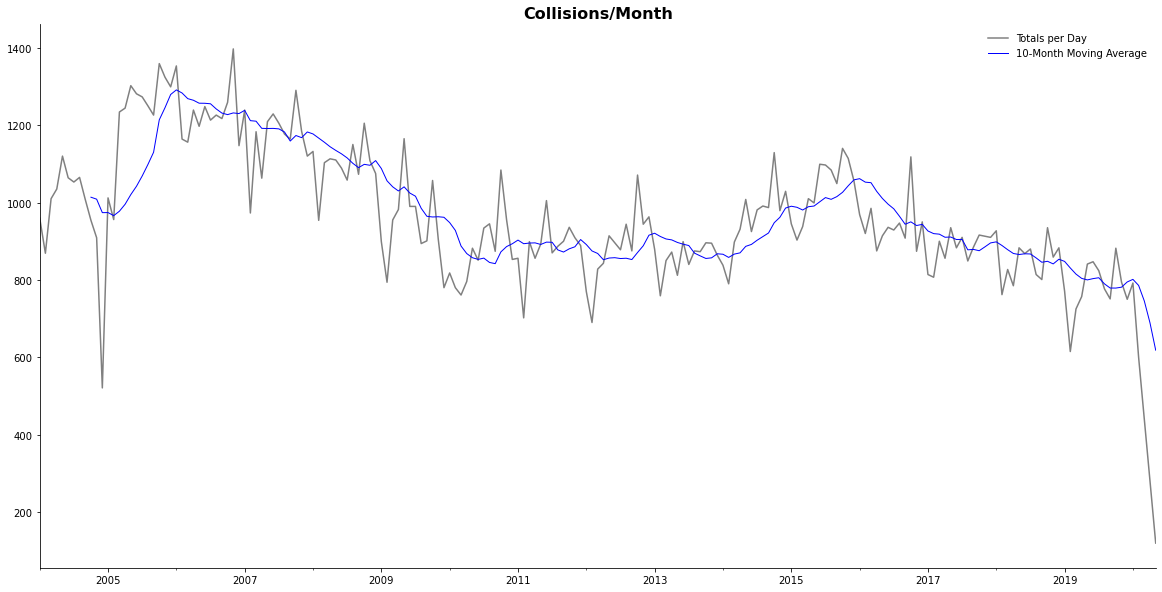

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
df.set_index('INCDTTM').resample('M').size().plot(label='Totals per Day', color='grey', ax=ax)
df.set_index('INCDTTM').resample('M').size().rolling(window=10).mean()\
                    .plot(color='blue', linewidth=1, label='10-Month Moving Average', ax=ax)
ax.set_title('Collisions/Month', fontweight = 'bold', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(frameon=False, bbox_to_anchor=(1, 1))
sns.despine(ax=ax, top=True, bottom=False, left=False, right=True)

In [1]:
#https://en.wikipedia.org/wiki/Dickey–Fuller_test
# p-value is > 0.5 so at this resolution it is not stationary.

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df.set_index('INCDTTM').resample('M').size())
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags Used','# Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Dickey-Fuller Test:')
print(dfoutput)

NameError: name 'df' is not defined

Data is seasonal with a declining trend.

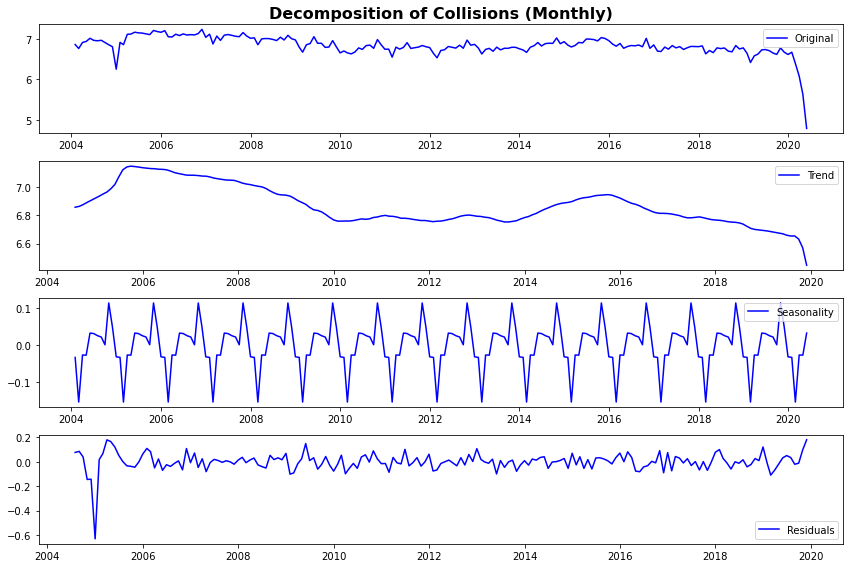

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts = df.set_index('INCDTTM').resample('M').size()
decomposition = seasonal_decompose(np.log(ts))

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(ts), label='Original', color='blue')
plt.title('Decomposition of Collisions (Monthly)', fontweight='bold', fontsize=16)
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

[Text(0.5, 0, 'Collisions'), Text(0, 0.5, 'Peak')]

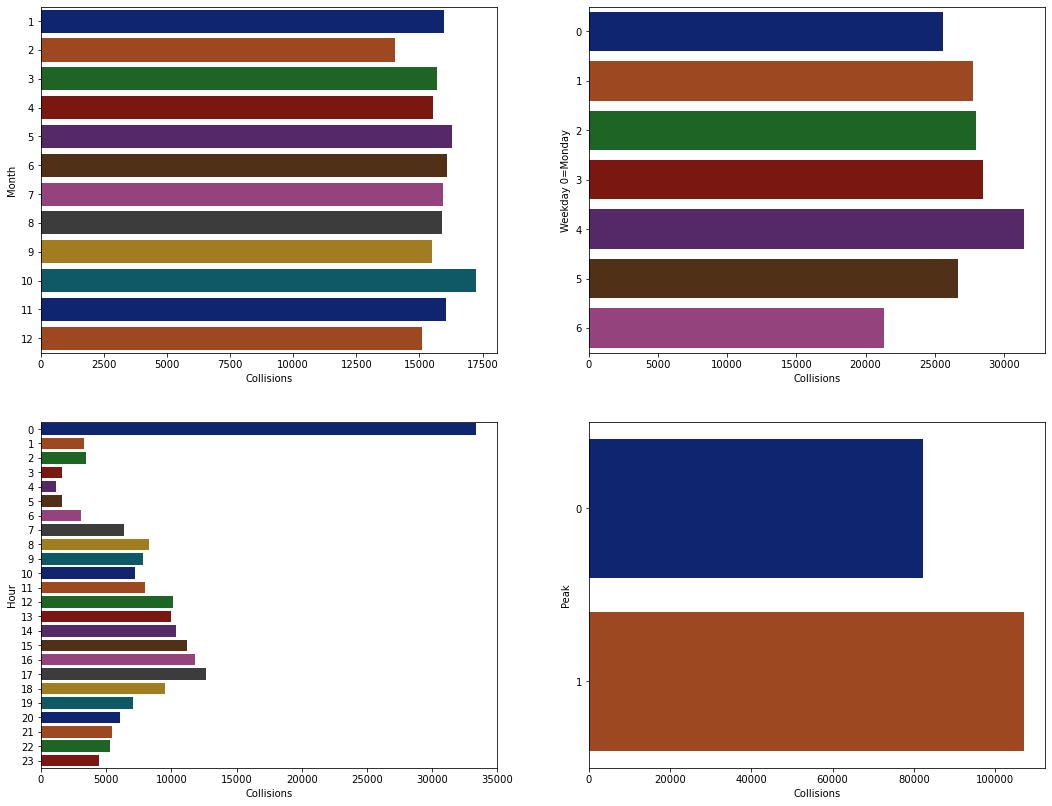

In [34]:
fig, ax = plt.subplots(2,2, figsize = (18, 14))
ax1, ax2, ax3, ax4 = ax.flatten()

sns.countplot(y="MONTH", data=df, ax=ax1, palette='dark')
ax1.set(xlabel='Collisions', ylabel="Month")

sns.countplot(y="WEEKDAY", data=df, ax=ax2, palette='dark')
ax2.set(xlabel='Collisions', ylabel="Weekday 0=Monday")

#sns.countplot(y="HOUR", hue="SEVERITYCODE", data=df[(df.HOUR != 0)], ax=ax3)
sns.countplot(y="HOUR", data=df, ax=ax3, palette='dark')
ax3.set(xlabel='Collisions', ylabel="Hour")

sns.countplot(y="PEAKOROFFPEAK", data=df, ax=ax4, palette='dark')
ax4.set(xlabel='Collisions', ylabel="Peak")

[Text(0.5, 0, 'Collisions'), Text(0, 0.5, 'Week')]

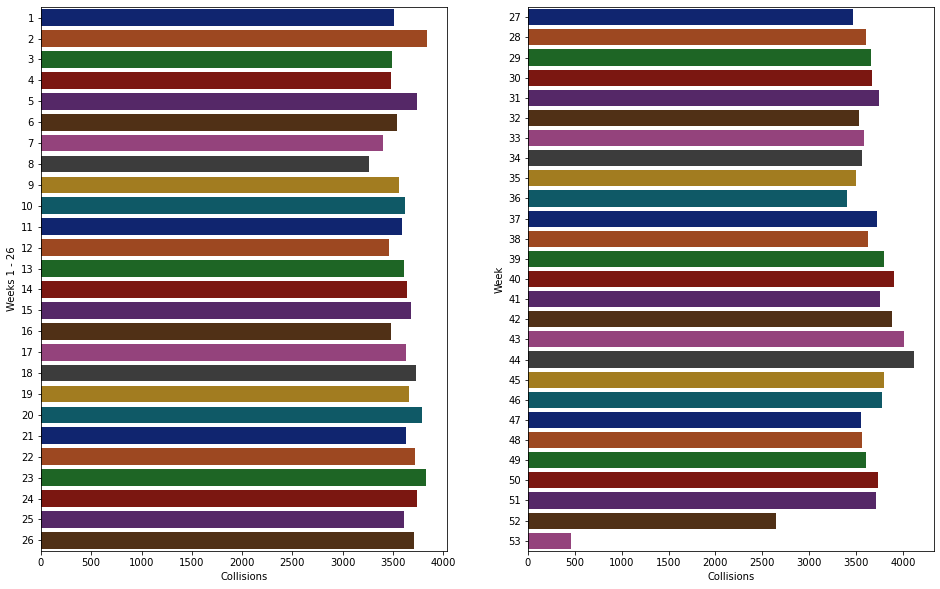

In [35]:
fig, (ax5, ax6) = plt.subplots(1, 2, figsize = (16, 10))
sns.countplot(y='YEARWEEK', data=df[(df.YEARWEEK <= 26)], ax=ax5, palette='dark')
ax5.set(xlabel='Collisions', ylabel="Weeks 1 - 26")
sns.countplot(y='YEARWEEK', data=df[(df.YEARWEEK > 26)], ax=ax6, palette='dark')
ax6.set(xlabel='Collisions', ylabel="Week")

In [36]:
# Get daily time series and convert to a df
total_weekday = pd.DataFrame(df.set_index('INCDTTM').resample('1d').size().reset_index())
total_weekday.columns = ['Date', 'Count']
weekdays = total_weekday['Date'].dt.day_name()

In [37]:
# Group by weekdays and get daily average
weekday_avg = total_weekday.groupby(weekdays)['Count'].mean().reset_index()
weekday_avg.columns = ['Weekday', 'Average']
weekday_avg.set_index('Weekday', inplace = True)
weekday_avg.sort_values(by = 'Average', ascending = False)

,Average
Weekday,
Friday,36.753216
Thursday,33.362573
Wednesday,32.739181
Tuesday,32.476023
Saturday,31.197661
Monday,29.974269
Sunday,24.946199


In [38]:
total_weekday_2 = df.groupby('WEEKDAY').size().reset_index()
total_weekday_2.columns = ['Weekday', 'Count']
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'} 
total_weekday_2['Weekday'] = total_weekday_2['Weekday'].apply(lambda x: days[x]) 
total_weekday_2.set_index('Weekday', inplace=True)
total_weekday_2.sort_values(by = 'Count', ascending = False)

,Count
Weekday,
Friday,31424
Thursday,28525
Wednesday,27992
Tuesday,27767
Saturday,26674
Monday,25628
Sunday,21329


In [39]:
df.INCDTTM.dt.strftime('%m/%d').value_counts().sort_values(ascending=False).to_frame().head(25)

,INCDTTM
12/20,623
10/28,622
11/01,618
11/15,616
11/02,613
10/31,612
11/21,608
10/30,608
11/05,605
06/08,604


In [40]:
df.INCDTTM.dt.strftime('%m/%d/%y').value_counts().sort_values(ascending=False).to_frame().head(25)

,INCDTTM
11/02/06,88
10/03/08,85
05/18/05,83
11/05/05,82
01/13/06,77
10/31/08,76
04/29/05,74
07/20/07,73
12/04/04,72
04/15/05,71


# Environmental Conditions - Weather, Road, Light

In [41]:
df['WEATHER'].unique()

array(['Overcast', 'Raining', 'Clear', nan, 'Unknown', 'Other', 'Snowing',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [42]:
df['ROADCOND'].unique()

array(['Wet', 'Dry', nan, 'Unknown', 'Snow/Slush', 'Ice', 'Other',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'], dtype=object)

In [43]:
df['LIGHTCOND'].unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       nan, 'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off',
       'Other', 'Dark - Unknown Lighting'], dtype=object)

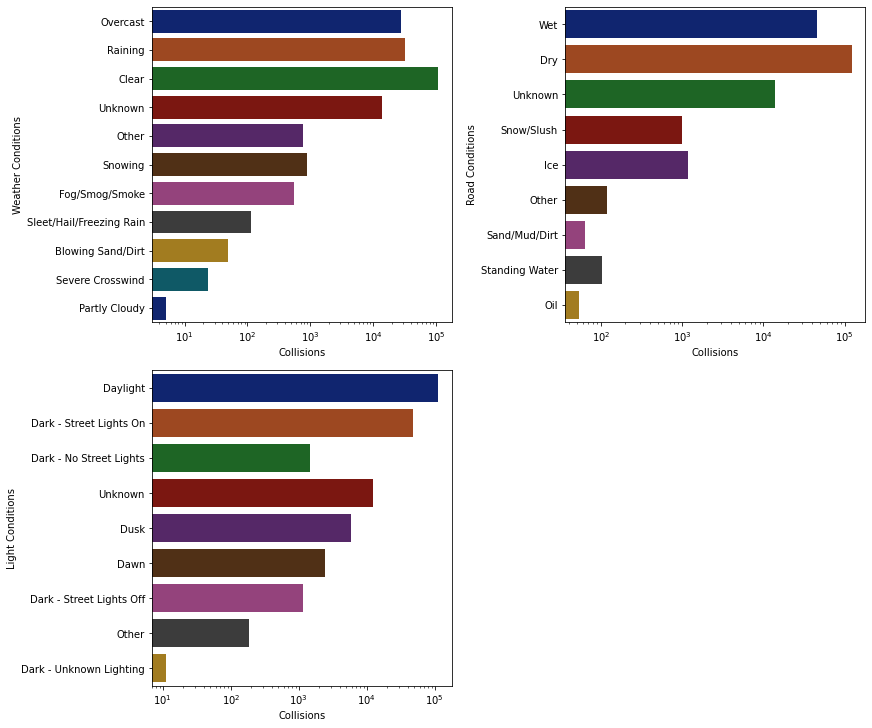

In [44]:
fig, ax = plt.subplots(2,2, figsize = (12, 10), constrained_layout=True)
ax1, ax2, ax3, ax4 = ax.flatten()
fig.delaxes(ax[1,1])

g = sns.countplot(y="WEATHER", data=df, ax=ax1, palette='dark')
ax1.set(xlabel='Collisions', ylabel="Weather Conditions")
g.set_xscale("log")

g = sns.countplot(y="ROADCOND", data=df, ax=ax2, palette='dark')
ax2.set(xlabel='Collisions', ylabel="Road Conditions")
g.set_xscale("log")

g = sns.countplot(y="LIGHTCOND", data=df, ax=ax3, palette='dark')
ax3.set(xlabel='Collisions', ylabel="Light Conditions")
g.set_xscale("log")

# Collision Descriptors

['Angles' 'Sideswipe' 'Parked Car' 'Other' 'Cycles' 'Rear Ended' 'Head On'
 nan 'Left Turn' 'Pedestrian' 'Right Turn']


<AxesSubplot:xlabel='COLLISIONTYPE', ylabel='count'>

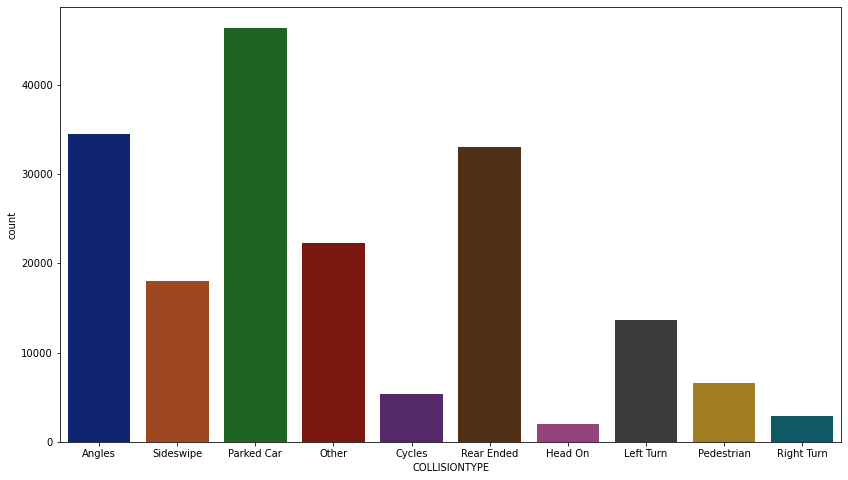

In [45]:
# These are a superset of SDOT collision types.  Also overlap with HITPARKEDCAR.
print(df['COLLISIONTYPE'].unique())
fig, ax = plt.subplots(figsize=(14,8))
sns.countplot(x="COLLISIONTYPE", data=df, ax=ax, palette='dark')

[11 16 14 51 13 26 28 18 34  0 24 69 12 21 23 29 27 48 15 55 33 56 54 31
 44 32 25 66 36 64 22 58 47 61 35 53 46 68 52]


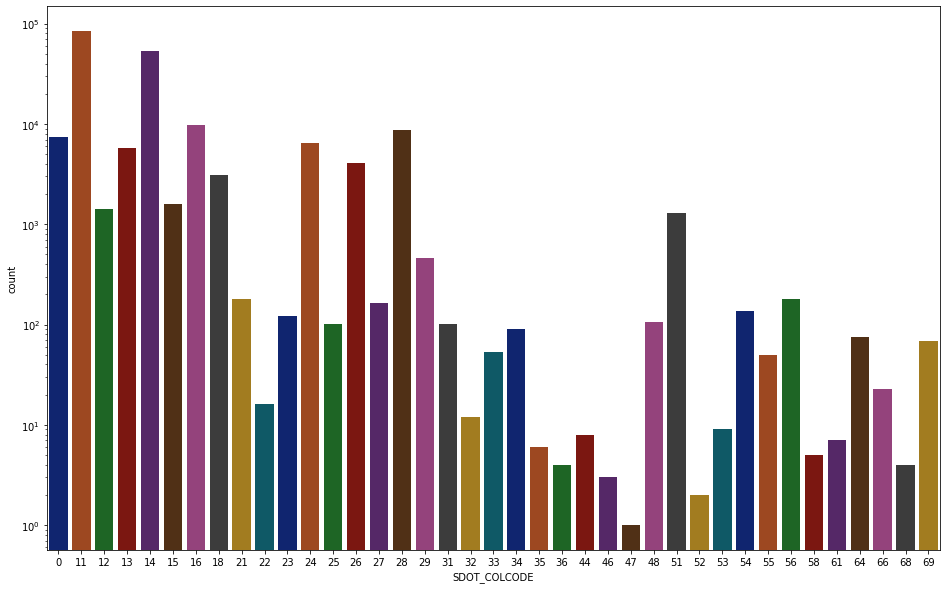

In [46]:
print(df['SDOT_COLCODE'].unique())
fig, ax = plt.subplots(figsize=(16,10))
g = sns.countplot(x="SDOT_COLCODE", data=df, ax=ax, palette='dark')
g.set_yscale("log")

In [47]:
# SDOT and Washington State collision codes are different but representing the same thing.  So much for standardization.
# Use the SDOT codes only, do not use the state ones
df['SDOT_COLDESC'].unique()

array(['MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE',
       'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE',
       'MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END',
       'PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE',
       'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE',
       'MOTOR VEHICLE STRUCK OBJECT IN ROAD',
       'MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT',
       'MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE',
       'DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END',
       'NOT ENOUGH INFORMATION / NOT APPLICABLE',
       'MOTOR VEHCILE STRUCK PEDESTRIAN',
       'PEDALCYCLIST OVERTURNED IN ROAD',
       'MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE',
       'MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END',
       'MOTOR VEHICLE STRUCK PEDALCYCLIST, LEFT SIDE SIDESWIPE',
       'MOTOR VEHICLE OVERTURNED IN ROAD',
       'MOTOR VEHICLE RAN OFF ROAD - NO COLLISION',
       'DRIVERLESS VEHICLE RAN OFF ROAD - HIT F